# Assignment 
## 771768 - Introduction to Programming for Artificial Intelligence and Data Science 
### Customer Data Pre-processing

### Import libraries

In [1]:
import csv
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Task 1 - Read data with csv libray

In [2]:
## Read the dataset with CSV and if not found, print an exception error message
try:
    with open('acw_user_data.csv', mode='r') as csv_file:
        reader = csv.reader(csv_file,delimiter=',')
        next(reader) #This removes the first row, which is the header
        list_items = []

        for line in reader:
            list_items.append(line)
except FileNotFoundError as err:
    print(err)

### Task 2 - Convert all flat structures into nested structures

In [3]:
new_data = []

for row in list_items:
    address_street = row[0]
    address_city = row[1]
    address_postcode = row[2]
    age = int(row[3])
    distance=float(row[4])
    employer = row[5]
    credit_card_start_date=row[6]
    credit_card_expiry_date=row[7]
    credit_card_number=row[8]
    credit_card_cvv=int(row[9])
    dependants=row[10]
    first_name=row[11]
    bank_iban=row[12]
    last_name=row[13]
    marital_status=row[14]
    yearly_pension=int(row[15])
    retired=row[16]
    yearly_salary=int(row[17])
    sex=row[18]
    vehicle_make=row[19]
    vehicle_model=row[20]
    vehicle_year=row[21]
    vehicle_type=row[22]
        
    
     ## Create dictionaries for address, vehicle and credit card
        
    address = {'Address Street':address_street, 'Address City':address_city, 
           'Address Postcode':address_postcode }
        
    vehicle = {'Vehicle Make':vehicle_make, 'Vehicle Model':vehicle_model,
           'Vehicle Year':vehicle_year, 'Vehicle Type':vehicle_type}
        
    credit_card = {'Credit Card Start Date':credit_card_start_date, 
               'Credit Card Expiry Date':credit_card_expiry_date, 
                'Credit Card Number':credit_card_number, 
                'Credit Card CVV':credit_card_cvv, 'Bank IBAN':bank_iban}
    
    
    ## Create dictionary for the new data
        
    acw = {"Address":address, 
        "Age(Years)": age, 
        'Distance Commuted to Work (miles)':distance, 
        'Employer Company':employer,
        'Credit Card':credit_card, 
        'Dependants':dependants, 
        'First Name':first_name, 
        'Last Name':last_name, 
        'Marital Status':marital_status, 
        'Yearly Pension (GBP)':yearly_pension, 
        'Retired':retired, 
        'Yearly Salary':yearly_salary, 
        'Sex':sex}
       
    ## Append the dictionary creadted above to the new data
    new_data.append(acw)


### Task 3 - List of problematic rows for dependants

In [4]:
#These are rows with blanks for dependant
problematic_dependants=[]
for line, row in enumerate(new_data):
    if row['Dependants'] == '' or row['Dependants']==' ':
        problematic_dependants.append(line)
        row['Dependants']=0

In [5]:
#List of problematic dependants
problematic_dependants

[21,
 109,
 179,
 205,
 270,
 272,
 274,
 358,
 460,
 468,
 579,
 636,
 679,
 725,
 822,
 865,
 917,
 931,
 983]

### Task 4 - Write all records to a processed.json file in the JSON data format

In [6]:
with open('processed.json', mode='w') as user:
    json.dump(new_data, user)

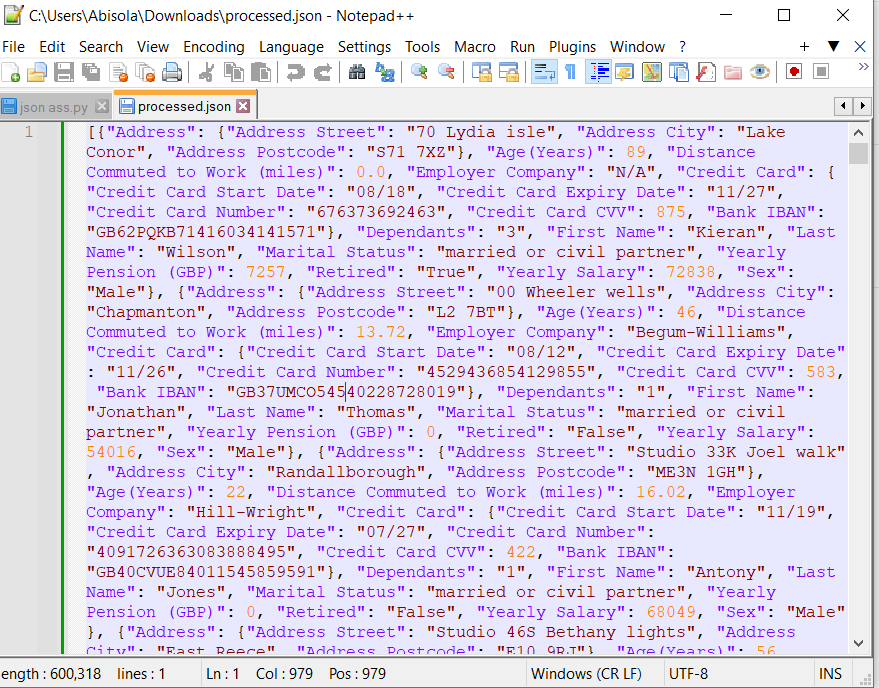

### Task 5 - Retired Customers

In [7]:
retired = [row for row in new_data if row['Retired']=='True' ]

with open('retired.json', mode='w') as ret:
    json.dump(retired, ret)

####  Employed Customers

In [8]:
employed=[row for row in new_data if row['Employer Company']!='N/A']

with open('employed.json', mode='w') as emp:
    json.dump(employed, emp)

### Task 6 - Remove Credit Card

In [9]:
#A list to hold customers greater than 10 years
remove_ccard_list=[]

In [10]:
def remove_ccard(row):
    
    #checks if row is already in list
    if row in remove_ccard_list:
        print(f'Row {row} is flagged in the list already')
    else:
        #Split the date to get the month and years
        cc_start_date = new_data[row]['Credit Card']['Credit Card Start Date'].split('/')
        cc_exp_date = new_data[row]['Credit Card']['Credit Card Expiry Date'].split('/')

        #Extract the month
        mm_start = int(cc_start_date[0])
        mm_exp = int(cc_exp_date[0])

        #Extract the Year
        yy_start = int(cc_start_date[1])
        yy_exp = int(cc_exp_date[1])


        #Takes the difference between the start and end years, putting into consideration where the expiry month 
        #is less than the start month

        if mm_exp - mm_start < 0:
            yy_diff = yy_exp - yy_start - 1
        else:
            yy_diff = yy_exp-yy_start

        #Flag rows where the difference is greater than 10 years    
        if yy_diff >10:
            print(f'Row {row} should be flagged')
            remove_ccard_list.append(row)


In [11]:
remove_ccard(1)

Row 1 should be flagged


In [12]:
#Reading the list items to populate the data for the json file

remove_ccard_data=[new_data[row] for row in remove_ccard_list]

with open('remove_ccard.json', mode='w') as card:
    json.dump(remove_ccard_data, card)

### Task 7a: Salary Commute

In [13]:
#Reading in from processed.json
with open('processed.json', mode='r') as file:
    processed =json.load(file)

In [14]:
#Computing salary commute, rounding off to 2 decimal places
for row in processed:
    salary_commute=[]
    salary = row['Yearly Salary']
    dist_commuted = row['Distance Commuted to Work (miles)']
    if dist_commuted > 1:
        salary_commute = round(salary/dist_commuted,2)
    else:
        salary_commute=salary
    row['Salary-Commute']=salary_commute
    print(salary_commute)

72838
3937.03
4247.75
4720.26
3105.39
3550.79
4820.2
27964
4148.66
66157
3598.83
3208.27
4846.51
3405.17
59891
4461.72
4635.45
3145.56
3610.0
4125.46
4559.19
3709.02
4494.54
4415.68
4467.79
3545.51
4302.98
4475.91
4740.07
4765.84
4044.74
3184.33
80297
4641.57
70109
57953
3767.2
81220
4157.36
3450.46
3222.48
3132.71
4824.8
4521.99
3128.03
4180.73
59223
3384.91
3098.97
4689.38
4637.81
3213.87
97406
26452
3090.5
3647.35
4397.95
92899
59872
4025.99
3977.03
62907
4436.04
4234.26
3705.36
3584.56
4688.81
3709.09
90989
4708.87
4492.22
4106.21
3875.08
4182.38
66210
4575.23
4540.04
77566
3778.55
33081
3671.0
3302.83
3744.17
93472
4850.69
3286.59
3993.29
4802.11
3788.89
4248.53
3094.07
34869
4795.72
4343.47
19405
4624.61
4200.06
4227.44
3816.52
27904
54451
40184
4594.2
3977.41
3175.42
77914
3825.31
4761.54
3271.36
4271.65
25565
4306.7
97308
4148.43
3541.49
4319.54
4491.15
4832.09
3399.57
4824.63
4408.8
3871.88
4280.92
87281
3722.66
25474
4348.66
4069.0
4382.14
3452.02
4806.97
3521.22
4012.72
1812

#### 7b. Sorting by Salary-Commute

In [15]:
commute = sorted(processed, key=lambda k: k['Salary-Commute'])

#### 7c. Storing the output as a commute.json

In [16]:
with open('commute.json', mode='w') as comm:
    json.dump(commute, comm)

# 
## Data Visualisation Using Pandas and Seaborn 

### Reading in the data

In [17]:
df = pd.read_csv('acw_user_data.csv')

df.head(2)

,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (miles),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (GBP),Retired,Yearly Salary (GBP),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,70 Lydia isle,Lake Conor,S71 7XZ,89,0.00,NaN,08/18,11/27,676373692463,875,...,Wilson,married or civil partner,7257,True,72838,Male,Hyundai,Bonneville,2009,Pickup
1,00 Wheeler wells,Chapmanton,L2 7BT,46,13.72,Begum-Williams,08/12,11/26,4529436854129855,583,...,Thomas,married or civil partner,0,False,54016,Male,Nissan,ATS,1996,Coupe


In [18]:
df.columns

Index(['Address Street', 'Address City', 'Address Postcode', 'Age (Years)',
       'Distance Commuted to Work (miles)', 'Employer Company',
       'Credit Card Start Date', 'Credit Card Expiry Date',
       'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name',
       'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)',
       'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make',
       'Vehicle Model', 'Vehicle Year', 'Vehicle Type'],
      dtype='object')

#### Data series for Salary

In [19]:
salary = df['Yearly Salary (GBP)']
print(type(salary))

<class 'pandas.core.series.Series'>


#### Data series for Age

In [20]:
age = df['Age (Years)']
print(type(age))

<class 'pandas.core.series.Series'>


### Task 1. The mean of the salary and the median age

In [21]:
mean_salary = salary.mean()
median_age = age.median()

print("The mean salary is " + str(mean_salary))
print("The median age is " + str(median_age))

The mean salary is 57814.078
The median age is 54.0


### Task 2a. Univariate plot for Age

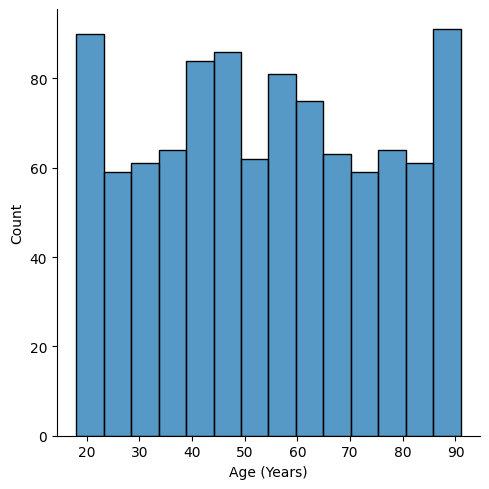

In [22]:
max_age = age.max()
min_age = age.min()
age_diff = max_age - min_age
num_of_bins = age_diff // 5
age_plt = sns.displot(age, bins=num_of_bins)

### Task 2b. Univariate plot for Dependants and fixing null values

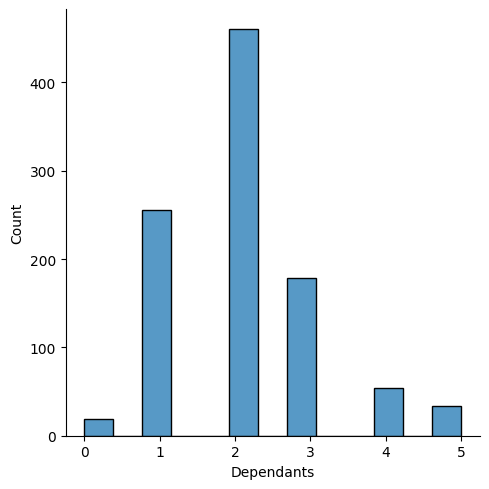

In [23]:
dependant_plt = sns.displot(df['Dependants'].fillna(0))

### Task 2c. Univariate plot for Age conditioned on Marital status

C:\Users\Abisola\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


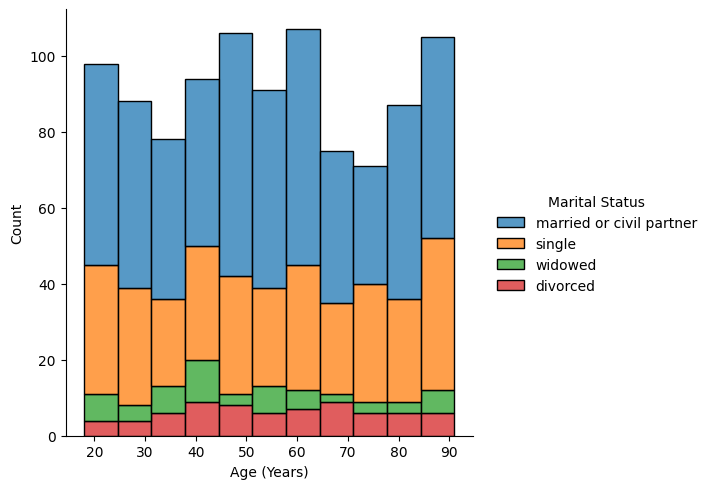

In [24]:
age_conditioned_plt = sns.displot(df, x=age, hue='Marital Status', multiple='stack')

### Task 3a. Commuted distance against Salary

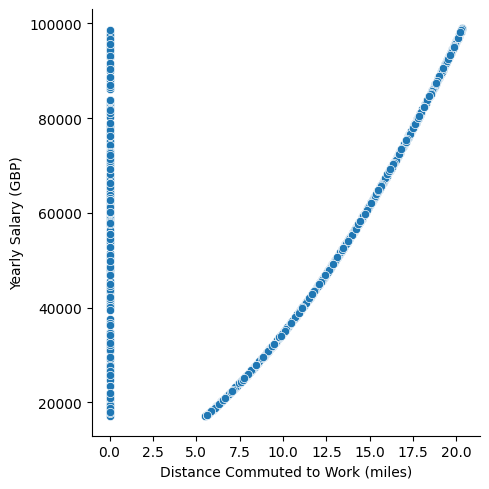

In [25]:
dist_sal_plt = sns.relplot(data = df, x = 'Distance Commuted to Work (miles)', y = 'Yearly Salary (GBP)')

### Task 3b. Age Vs Salary

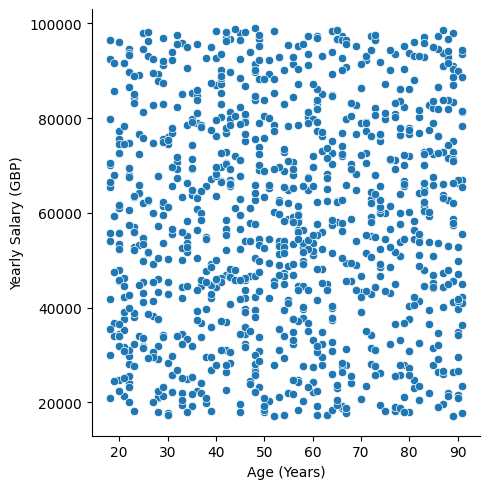

In [26]:
age_sal_plt = sns.relplot(data = df, x = 'Age (Years)', y = 'Yearly Salary (GBP)')

### Task 3c. Age Vs Salary conditioned by Dependants

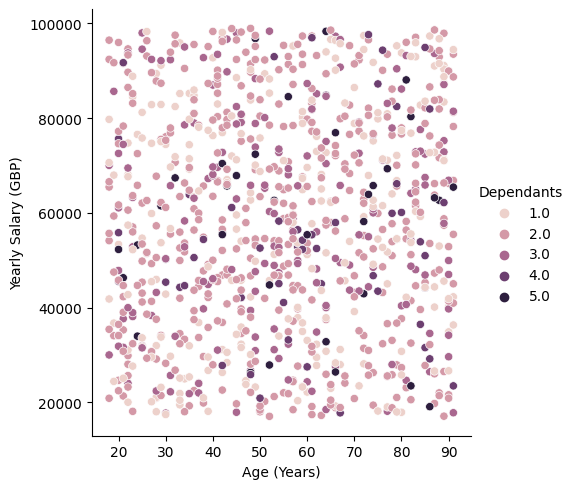

In [27]:
age_sal_conditioned_plt = sns.relplot(data = df, x='Age (Years)', y='Yearly Salary (GBP)', hue = 'Dependants')

### Task 4.  Saving the Plots

In [28]:
plots_to_save = {}
plots_to_save["Age.png"] = age_plt
plots_to_save["Dependant.png"] = dependant_plt
plots_to_save["AgeConditioned.png"] = age_conditioned_plt
plots_to_save["DistVsSalary.png"] = dist_sal_plt
plots_to_save["AgeVsSalary.png"] = age_sal_plt
plots_to_save["AgeVsSalaryConditioned.png"] = age_sal_conditioned_plt

for k,v in plots_to_save.items():
    v.savefig(k)